In [2]:
import pandas as pd 
import numpy as np

def readFromFile(file_path):
    """
    Reads data from a file with the given path and returns a data frame that contains the records from the path
    file_path: a file's path
    return: data frame
    """
    dataFrame = pd.read_csv(file_path, delimiter=',', header='infer')
    return dataFrame


/tmp/ipykernel_20819/3840670035.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def numberOfEmployees(employees):
    """
    Returns the number of employees in a data frame
    employees: data frame
    return: number of employees
    """
    return employees.shape[0]

In [4]:
def numberAndTypesOfFields(employees):
    """
    Returns the number of fields that an employee has and the type for each field
    employees: data frame
    """
    numberOfFields = employees.shape[1]
    types = employees.dtypes
    return numberOfFields, types


In [5]:
def numberOfEmployeesThatHaveAllDatasCompleted(employees):
    """
    Returns the number of employees that have all fields completed
    employees: data frame
    """
    employeesThatHaveFullData = employees.dropna()
    return employeesThatHaveFullData.shape[0]

In [6]:
def MinMaxAverageValuesForNumericFields(employees):
    """
    Returns the min, max and average value for each numeric field
    employees: data frame
    """
    minValues = employees.min(numeric_only=True)
    maxValues = employees.max(numeric_only=True)
    averageValues = employees.mean(numeric_only=True)
    return minValues, maxValues, averageValues

In [7]:
def numberOfPossibleValuesForNonNumericProperties(employees):
    """
    Returns the number of possible values for each non-numeric property in the given data frame
    employees: data frame
    """
    return employees.select_dtypes(exclude=np.number).nunique()
    

In [8]:
def hasEmptyValues(employees):
    """
    Returns True/False
    True - if there are rows that have empty properties
    False - otherwise
    """
    if numberOfEmployees(employees) == numberOfEmployeesThatHaveAllDatasCompleted(employees):
        return False
    else:
        return True
    
def replaceEmptyValues(employees):
    """
    Replace empty values with the average value of that property
    return: modified data frame
    """
    for property in employees.head(0):
        employees[property] = employees[property].fillna(employees[property].mode()[0])
    
    return employees;


In [9]:
from matplotlib import pyplot as plt

def salaryCategories(employees):
    """
    Histogram that displays the salary distribution of the employees by salary category
    """
    plt.hist(employees.Salary, 15, rwidth=0.8)
    plt.show()

In [10]:
def salaryandTeamCategories(employees):
    """
    Histogram that displays the salary distribution of the employees based on the salary and the team
    """
    salaryAndTeam = employees[["Salary", "Team"]].groupby("Team")
    numberOfTeams = len(employees.dropna()["Team"].unique())

    fig, axes = plt.subplots(numberOfTeams, 1, figsize=(10, 40))
    i = 0
    for team, salaryTeam in salaryAndTeam:
        salaryTeam["Salary"].plot(kind="hist", ax=axes[i])
        axes[i].set_title(team)
        i += 1
    
    plt.show()



In [11]:
def outlierEmployees(employees):
    """
    Outlier employees
    """
    qmin = employees['Salary'].quantile(0.01) 
    qmax = employees['Salary'].quantile(0.99)
    return employees[~employees.Salary.between(qmin, qmax)]

In [12]:
def tests(employees):
    #problema1a
    assert(numberOfEmployees(employees) == 1000)

    assert(numberAndTypesOfFields(employees)[0] == 8)

    assert(numberOfEmployeesThatHaveAllDatasCompleted(employees) == 764)
    
    assert(MinMaxAverageValuesForNumericFields(employees)[0].iloc[0] == 35013.0)
    assert(MinMaxAverageValuesForNumericFields(employees)[0].iloc[1] == 1.015)
    assert(MinMaxAverageValuesForNumericFields(employees)[1].iloc[0] == 149908.0)
    assert(MinMaxAverageValuesForNumericFields(employees)[1].iloc[1] == 19.944)
    assert(MinMaxAverageValuesForNumericFields(employees)[2].iloc[0] == 90662.181)
    assert(MinMaxAverageValuesForNumericFields(employees)[2].iloc[1] == 10.207555000000001)

    assert(numberOfPossibleValuesForNonNumericProperties(employees).iloc[0] == 200)
    assert(numberOfPossibleValuesForNonNumericProperties(employees).iloc[1] == 2)
    assert(numberOfPossibleValuesForNonNumericProperties(employees).iloc[2] == 972)
    assert(numberOfPossibleValuesForNonNumericProperties(employees).iloc[3] == 720)
    assert(numberOfPossibleValuesForNonNumericProperties(employees).iloc[4] == 2)
    assert(numberOfPossibleValuesForNonNumericProperties(employees).iloc[5] == 10)

    assert(hasEmptyValues(employees) == True)
    

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


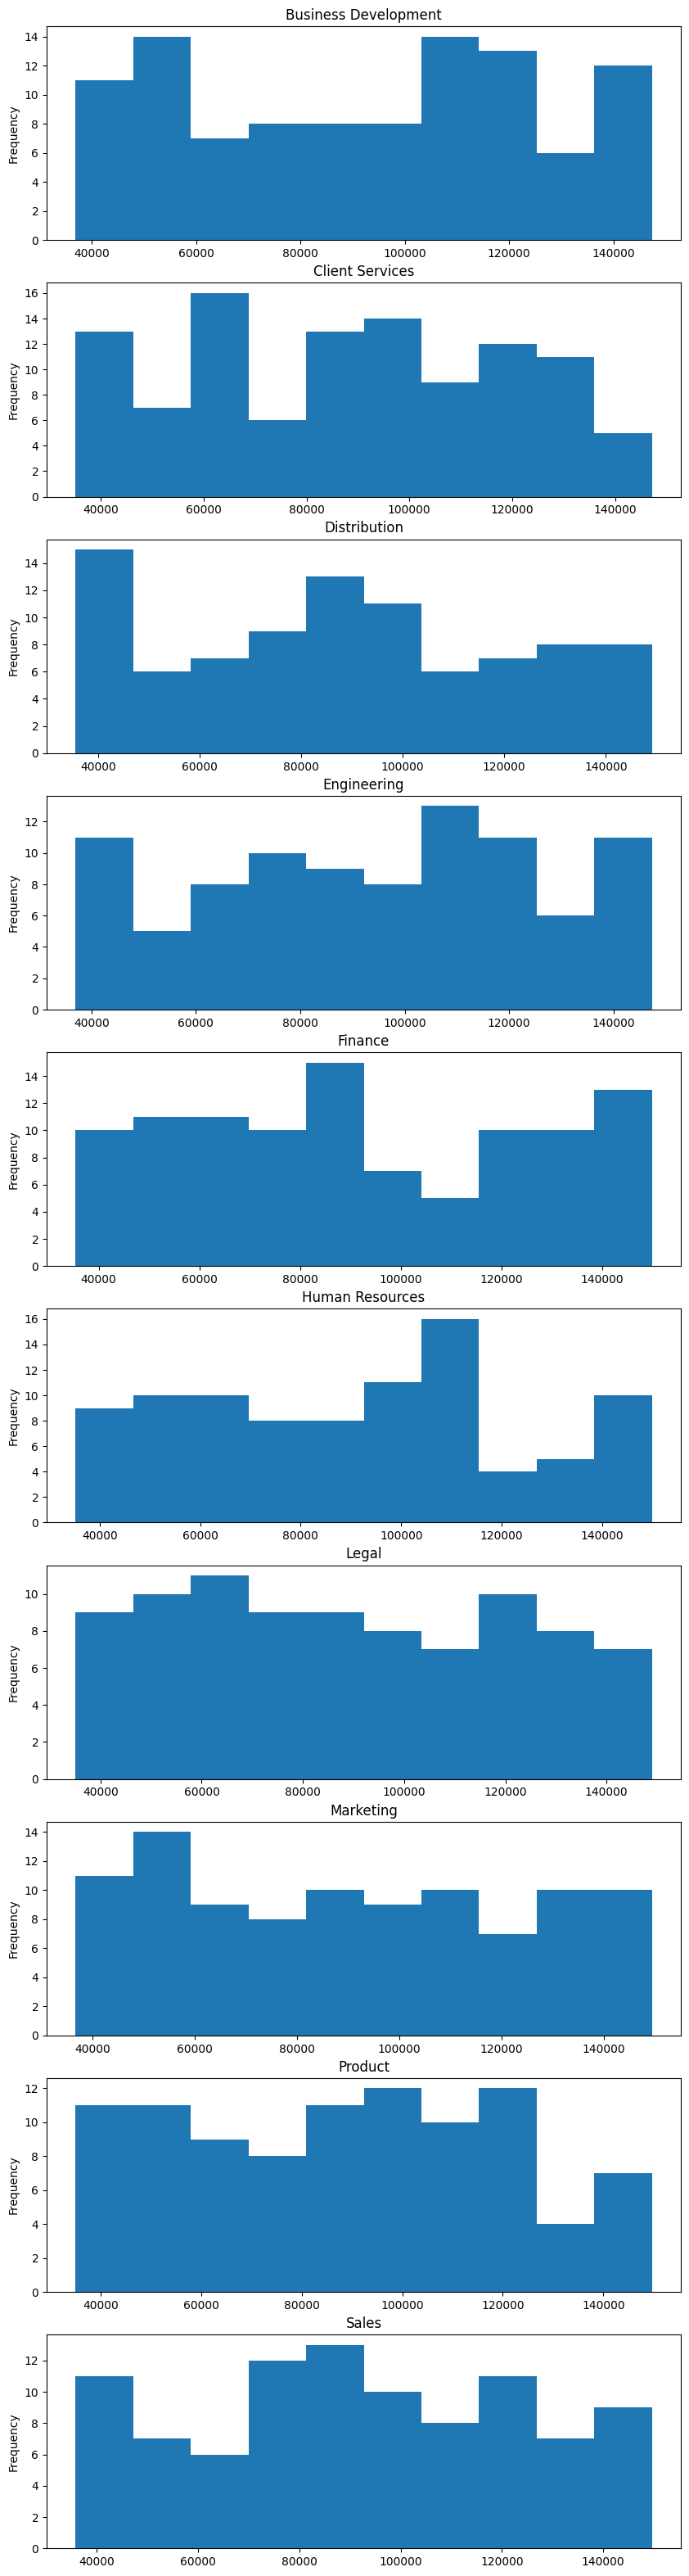

In [13]:
def main():
    employees = readFromFile('employees.csv')
    tests(employees)
    display(employees)

    #PROBLEMA 1A
    #a)
    # print(numberOfEmployees(employees))

    #b)
    # nr, types = numberAndTypesOfFields(employees)
    # print(nr, '\n', types)

    #c)
    # print(numberOfEmployeesThatHaveAllDatasCompleted(employees))

    #d)
    # minValues, maxValues, averageValues = MinMaxAverageValuesForNumericFields(employees)
    # print(minValues)
    # print(maxValues)
    # print(averageValues)

    #e)
    # print(numberOfPossibleValuesForNonNumericProperties(employees))

    #f)
    # print(hasEmptyValues(employees))
    # display(replaceEmptyValues(employees))


    #PROBLEMA 1B
    #a)
    # salaryCategories(employees)

    #b)
    # salaryandTeamCategories(employees)

    #c)
    # display(outlierEmployees(employees))
    

main()